## Pandas

### Series

In [1]:
import pandas as pd

In [2]:
ser = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
ser

a    1
b    2
c    3
dtype: int64

In [3]:
ser = pd.Series({'a': 1, 'b': 2, 'c': 3})
ser

a    1
b    2
c    3
dtype: int64

In [4]:
ser.index

Index(['a', 'b', 'c'], dtype='object')

In [5]:
ser.values

array([1, 2, 3], dtype=int64)

In [6]:
ser['a']

1

In [7]:
ser.iloc[0]

1

In [8]:
ser = ser.drop(['a', 'c'])
ser

b    2
dtype: int64

### DataFrame

In [9]:
df = pd.DataFrame([[1, 2, 3, 4], [5, 6, 7, 8]], columns=['col0', 'col1', 'col2', 'col3'], index=['idx0', 'idx1'])
df

,col0,col1,col2,col3
idx0,1,2,3,4
idx1,5,6,7,8


In [10]:
df = pd.DataFrame({'col0': [1, 5], 'col1': [2, 6], 'col2': [3, 7], 'col3': [4, 8]}, index=['idx0', 'idx1'])
df

,col0,col1,col2,col3
idx0,1,2,3,4
idx1,5,6,7,8


In [11]:
df.to_csv('dummy_data.csv')
pd.read_csv('dummy_data.csv', index_col=0, header=0)

,col0,col1,col2,col3
idx0,1,2,3,4
idx1,5,6,7,8


In [12]:
df.shape

(2, 4)

In [13]:
# add a new column
df['new_col'] = ['i0', 'i1']
df

,col0,col1,col2,col3,new_col
idx0,1,2,3,4,i0
idx1,5,6,7,8,i1


In [14]:
# add a new row
df.loc['idx2'] = [9, 10, 11, 12, 'i2']
df

,col0,col1,col2,col3,new_col
idx0,1,2,3,4,i0
idx1,5,6,7,8,i1
idx2,9,10,11,12,i2


In [15]:
# set a new index
df.set_index('new_col', inplace=True)
df

,col0,col1,col2,col3
new_col,,,,
i0,1,2,3,4
i1,5,6,7,8
i2,9,10,11,12


In [16]:
# remove index name
df.index.name = None
df

,col0,col1,col2,col3
i0,1,2,3,4
i1,5,6,7,8
i2,9,10,11,12


In [17]:
# drop a column, ['col1', 'col3'] for multiple columns, axis=0 for row
df = df.drop('col3', axis=1)
df

,col0,col1,col2
i0,1,2,3
i1,5,6,7
i2,9,10,11


### Selecting data

In [18]:
import numpy as np

np.random.seed(0)
df = pd.DataFrame(np.random.randint(0, 10, (4, 6)), columns=['col0', 'col1', 'col2', 'col3', 'col4', 'col5'], index=['idx0', 'idx1', 'idx2', 'idx3'])
df

,col0,col1,col2,col3,col4,col5
idx0,5,0,3,3,7,9
idx1,3,5,2,4,7,6
idx2,8,8,1,6,7,7
idx3,8,1,5,9,8,9


In [19]:
# select a column
df['col1']
# df.loc[:, 'col1']
# df.iloc[:, 1]

idx0    0
idx1    5
idx2    8
idx3    1
Name: col1, dtype: int32

In [20]:
# select a row
df.loc['idx1']
# df.loc['idx1', :]
# df.iloc[1]

col0    3
col1    5
col2    2
col3    4
col4    7
col5    6
Name: idx1, dtype: int32

In [21]:
# select multiple columns
df[['col1', 'col3']]
# df.loc[:, ['col1', 'col3']]
# df.iloc[:, [1, 3]]

,col1,col3
idx0,0,3
idx1,5,4
idx2,8,6
idx3,1,9


In [22]:
# select multiple rows
df.loc[['idx1', 'idx3']]
# df.loc[['idx1', 'idx3'], :]
# df.iloc[[1, 3]]

,col0,col1,col2,col3,col4,col5
idx1,3,5,2,4,7,6
idx3,8,1,5,9,8,9


In [23]:
# select a cell
df.at['idx1', 'col1'] # faster than loc
# df.iat[1, 1]
# df.loc['idx1', 'col1']
# df.iloc[1, 1]

5

In [24]:
# set a cell value
df.at['idx1', 'col1'] = 100
# df.iat[1, 1] = 100
df

,col0,col1,col2,col3,col4,col5
idx0,5,0,3,3,7,9
idx1,3,100,2,4,7,6
idx2,8,8,1,6,7,7
idx3,8,1,5,9,8,9


In [25]:
# select by condition
df[df['col0'] >= 5]

,col0,col1,col2,col3,col4,col5
idx0,5,0,3,3,7,9
idx2,8,8,1,6,7,7
idx3,8,1,5,9,8,9


In [26]:
# select by multiple conditions
df[(df['col0'] >= 5) & (df['col2'] < 5)]

,col0,col1,col2,col3,col4,col5
idx0,5,0,3,3,7,9
idx2,8,8,1,6,7,7


In [27]:
# selct rows by column values
df[df['col1'].isin([100, 8])]

,col0,col1,col2,col3,col4,col5
idx1,3,100,2,4,7,6
idx2,8,8,1,6,7,7


In [28]:
# sort rows by column values
df.sort_values('col1', ascending=False)

,col0,col1,col2,col3,col4,col5
idx1,3,100,2,4,7,6
idx2,8,8,1,6,7,7
idx3,8,1,5,9,8,9
idx0,5,0,3,3,7,9


In [29]:
# sort columns by row values
df.sort_values('idx1', axis=1)

,col2,col0,col3,col5,col4,col1
idx0,3,5,3,9,7,0
idx1,2,3,4,6,7,100
idx2,1,8,6,7,7,8
idx3,5,8,9,9,8,1


In [30]:
# sort by index
df.sort_index(ascending=False)

,col0,col1,col2,col3,col4,col5
idx3,8,1,5,9,8,9
idx2,8,8,1,6,7,7
idx1,3,100,2,4,7,6
idx0,5,0,3,3,7,9


### Descriptive statistics

In [31]:
df.describe()

,col0,col1,col2,col3,col4,col5
count,4.00000,4.000000,4.000000,4.000000,4.00,4.00
mean,6.00000,27.250000,2.750000,5.500000,7.25,7.75
std,2.44949,48.630409,1.707825,2.645751,0.50,1.50
min,3.00000,0.000000,1.000000,3.000000,7.00,6.00
25%,4.50000,0.750000,1.750000,3.750000,7.00,6.75
50%,6.50000,4.500000,2.500000,5.000000,7.00,8.00
75%,8.00000,31.000000,3.500000,6.750000,7.25,9.00
max,8.00000,100.000000,5.000000,9.000000,8.00,9.00


In [32]:
# min of each column, axis=1 for row
df.min()

col0    3
col1    0
col2    1
col3    3
col4    7
col5    6
dtype: int32

In [33]:
# index of min of each column
df.idxmin()

col0    idx1
col1    idx0
col2    idx2
col3    idx0
col4    idx0
col5    idx1
dtype: object

In [34]:
df['col5'].value_counts()

col5
9    2
6    1
7    1
Name: count, dtype: int64

### Missing values

In [35]:
df = pd.DataFrame({'col0': [1, 2, np.nan, 4],
                   'col1': [5, 6, 7, 8],
                   'col2': [9, 10, 11, np.nan],
                   'col3': [13, 14, 15, 16]},
                  index=['idx0', 'idx1', 'idx2', 'idx3'])
df

,col0,col1,col2,col3
idx0,1.0,5,9.0,13
idx1,2.0,6,10.0,14
idx2,NaN,7,11.0,15
idx3,4.0,8,NaN,16


In [36]:
df.isna().any()

col0     True
col1    False
col2     True
col3    False
dtype: bool

In [37]:
x, y = np.where(df.isna())
nan_indices = list(zip(x, y))
nan_indices

[(2, 0), (3, 2)]

In [38]:
# drop rows with NaN, axis=1 for columns
df.dropna()

,col0,col1,col2,col3
idx0,1.0,5,9.0,13
idx1,2.0,6,10.0,14


In [39]:
# forward/backward fill NaN
df.ffill()

,col0,col1,col2,col3
idx0,1.0,5,9.0,13
idx1,2.0,6,10.0,14
idx2,2.0,7,11.0,15
idx3,4.0,8,11.0,16


In [40]:
# fill NaN with a value
df.fillna(df.mean())

,col0,col1,col2,col3
idx0,1.000000,5,9.0,13
idx1,2.000000,6,10.0,14
idx2,2.333333,7,11.0,15
idx3,4.000000,8,10.0,16


In [41]:
# fill NaN with linear interpolated values
df.interpolate(method='linear')

,col0,col1,col2,col3
idx0,1.0,5,9.0,13
idx1,2.0,6,10.0,14
idx2,3.0,7,11.0,15
idx3,4.0,8,11.0,16


In [42]:
# fill NaN with a value based on column
df.fillna({'col0': 0, 'col2': 1})

,col0,col1,col2,col3
idx0,1.0,5,9.0,13
idx1,2.0,6,10.0,14
idx2,0.0,7,11.0,15
idx3,4.0,8,1.0,16


### Duplicated Values

In [43]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9], [4, 5, 6]], columns=['col0', 'col1', 'col2'], index=['idx0', 'idx1', 'idx2', 'idx3'])
df

,col0,col1,col2
idx0,1,2,3
idx1,4,5,6
idx2,7,8,9
idx3,4,5,6


In [44]:
df.duplicated()

idx0    False
idx1    False
idx2    False
idx3     True
dtype: bool

In [45]:
# drop duplicated rows
df.drop_duplicates(keep='first')

,col0,col1,col2
idx0,1,2,3
idx1,4,5,6
idx2,7,8,9


### Abnormal values

In [46]:
np.random.seed(0)
df = pd.DataFrame(np.random.randint(0, 10, (10, 3)), columns=['col0', 'col1', 'col2'])
df.iloc[7, 1] = 100
df

,col0,col1,col2
0,5,0,3
1,3,7,9
2,3,5,2
3,4,7,6
4,8,8,1
5,6,7,7
6,8,1,5
7,9,100,9
8,4,3,0
9,3,5,0


<Axes: >

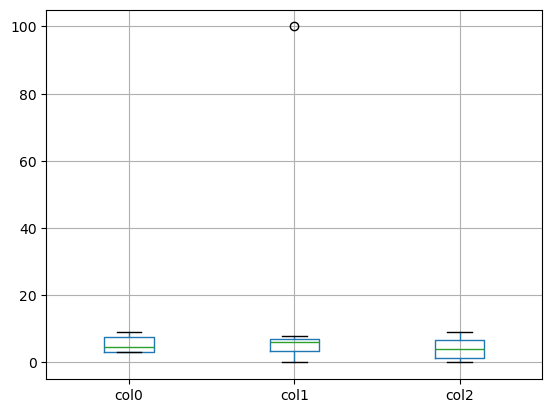

In [47]:
df.boxplot()